### Universidad del Valle de Guatemala
### Minería de Datos
### Laboratorio 02
### Marco Orozco (20857) y Santiago Taracena (20017)

En primer lugar, es necesario importar las librerías necesarias para el laboratorio.

In [3]:
# Librerías necesarias para el laboratorio.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Posteriormente necesitamos leer el archivo con datos. Esto lo podemos realizar llamando a la función read_csv de pandas.

In [4]:
# Cargar el dataset.
data = pd.read_csv("./data/breast-cancer-wisconsin.csv")

La columna "bare_nuclei" necesita ser limpiada, esto debido a que hay datos que no son números enteros, sino strings.

In [5]:
# Limpieza preliminar de la columna "bare_nuclei".
data["bare_nuclei"] = data["bare_nuclei"].apply(lambda x: 0 if (x == "?") else int(x))

#### **1.1)** Haga una exploración rápida de sus datos. Para eso haga un resumen de su dataset.

Para comenzar a explorar los datos, podemos observar las primeras cinco entradas del dataset con la función head, y también un resumen de estadísticas útiles del mismo con la función describe.

In [6]:
# Primeras filas del dataset.
data.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
# Descripción de columnas del dataset.
data.describe()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### **1.2)** Diga el tipo de cada una de las variables del dataset.

Podemos observar los tipos de datos de cada variable del dataset con la propiedad dtypes. Todas las propiedades son números enteros (cuantitativas, discretas).

In [8]:
# Tipos de datos del dataset.
data.dtypes

id                             int64
clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

#### **1.3)** Incluya gráficos exploratorios siendo consecuentes con el tipo de variable que están representando.

A continuación se encuentran algunos gráficos exploratorios que se consideraron útiles.

<AxesSubplot:xlabel='clump_thickness', ylabel='Count'>

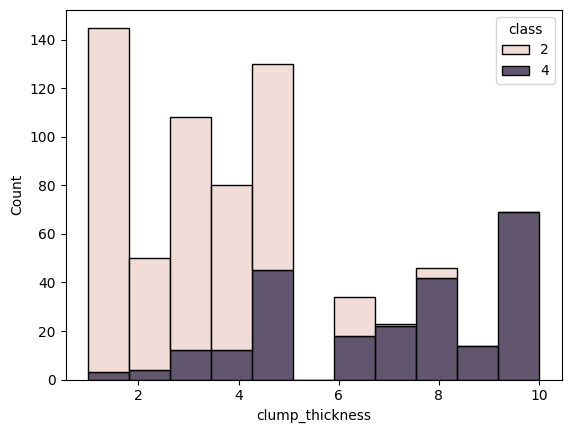

In [9]:
# Cantidad de tumores benignos y malignos por grosor/espesor del tumor.
sns.histplot(x="clump_thickness", hue="class", multiple="stack", data=data)

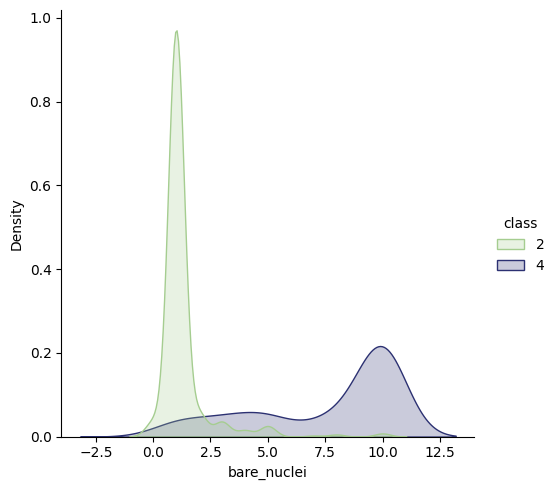

In [10]:
# Distribución de la cantidad de células nucleares en los tumores.
sns.displot(data=data, x="bare_nuclei", hue="class", kind="kde", fill=True, common_norm=False, palette="crest")

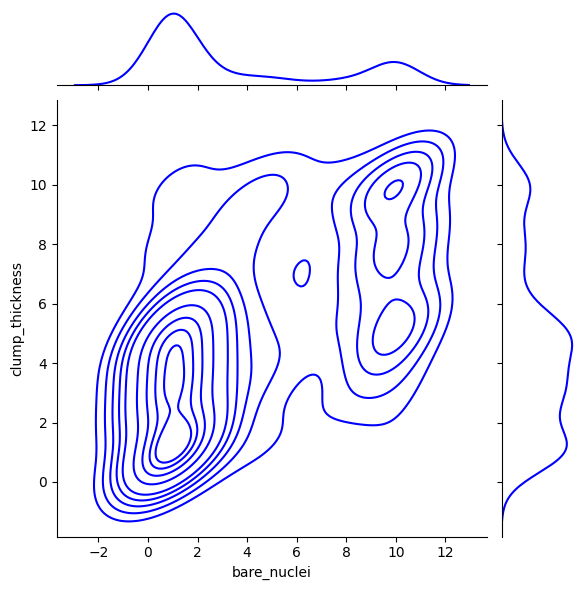

In [11]:
# Células nucleares respecto al grosor/espesor del tumor (conjunto).
sns.jointplot(x="bare_nuclei", y="clump_thickness", data=data, kind="kde", color="blue")

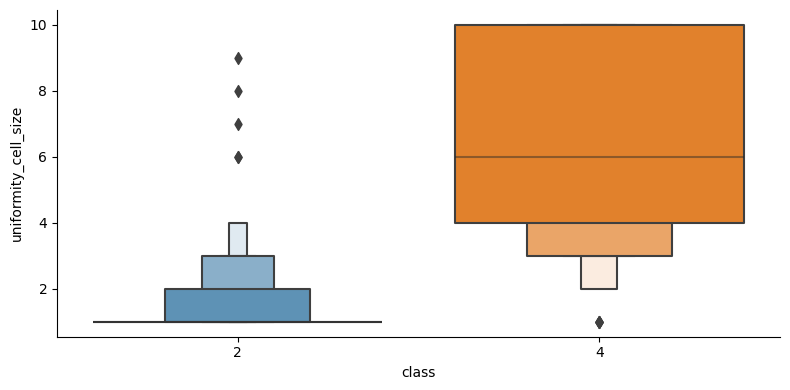

In [12]:
# Tamaño uniforme de células respecto a la clase del tumor.
sns.catplot(x="class", y="uniformity_cell_size", data=data, kind="boxen", height=4, aspect=2)

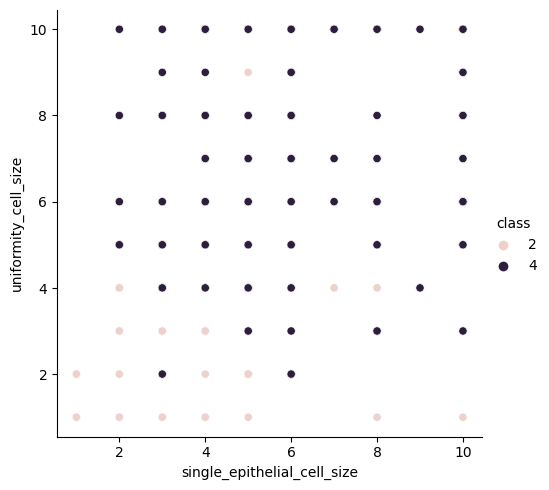

In [13]:
# Relación entre tamaño uniforme y epitelial de células.
sns.relplot(x="single_epithelial_cell_size", y="uniformity_cell_size", hue="class", data=data)

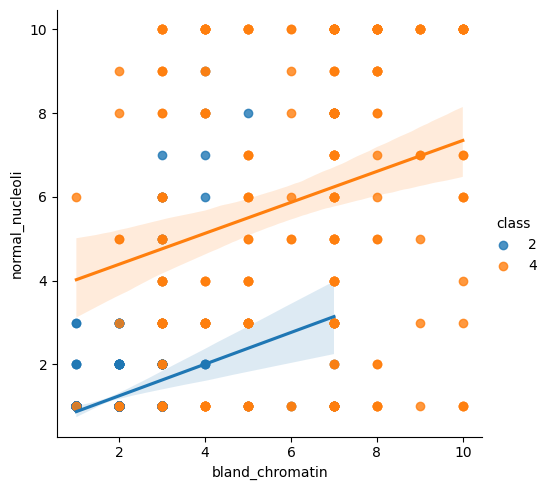

In [14]:

# Relación entre cromatina y núcleo de células por clase de tumor.
sns.lmplot(x="bland_chromatin", y="normal_nucleoli", hue="class", data=data)

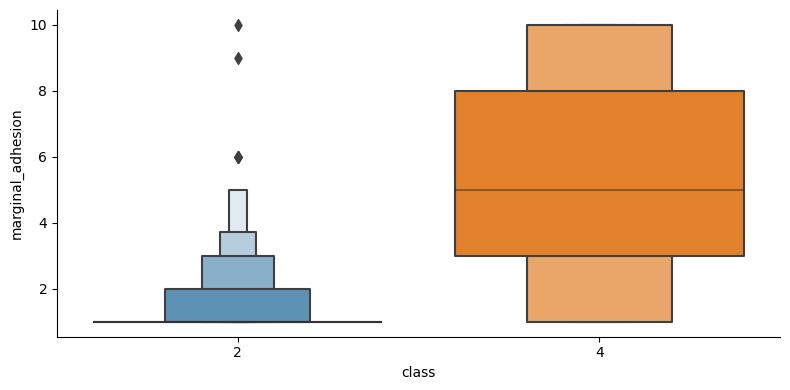

In [15]:
# Adhesión marginal respecto a la clase del tumor.
sns.catplot(x="class", y="marginal_adhesion", data=data, kind="boxen", height=4, aspect=2)

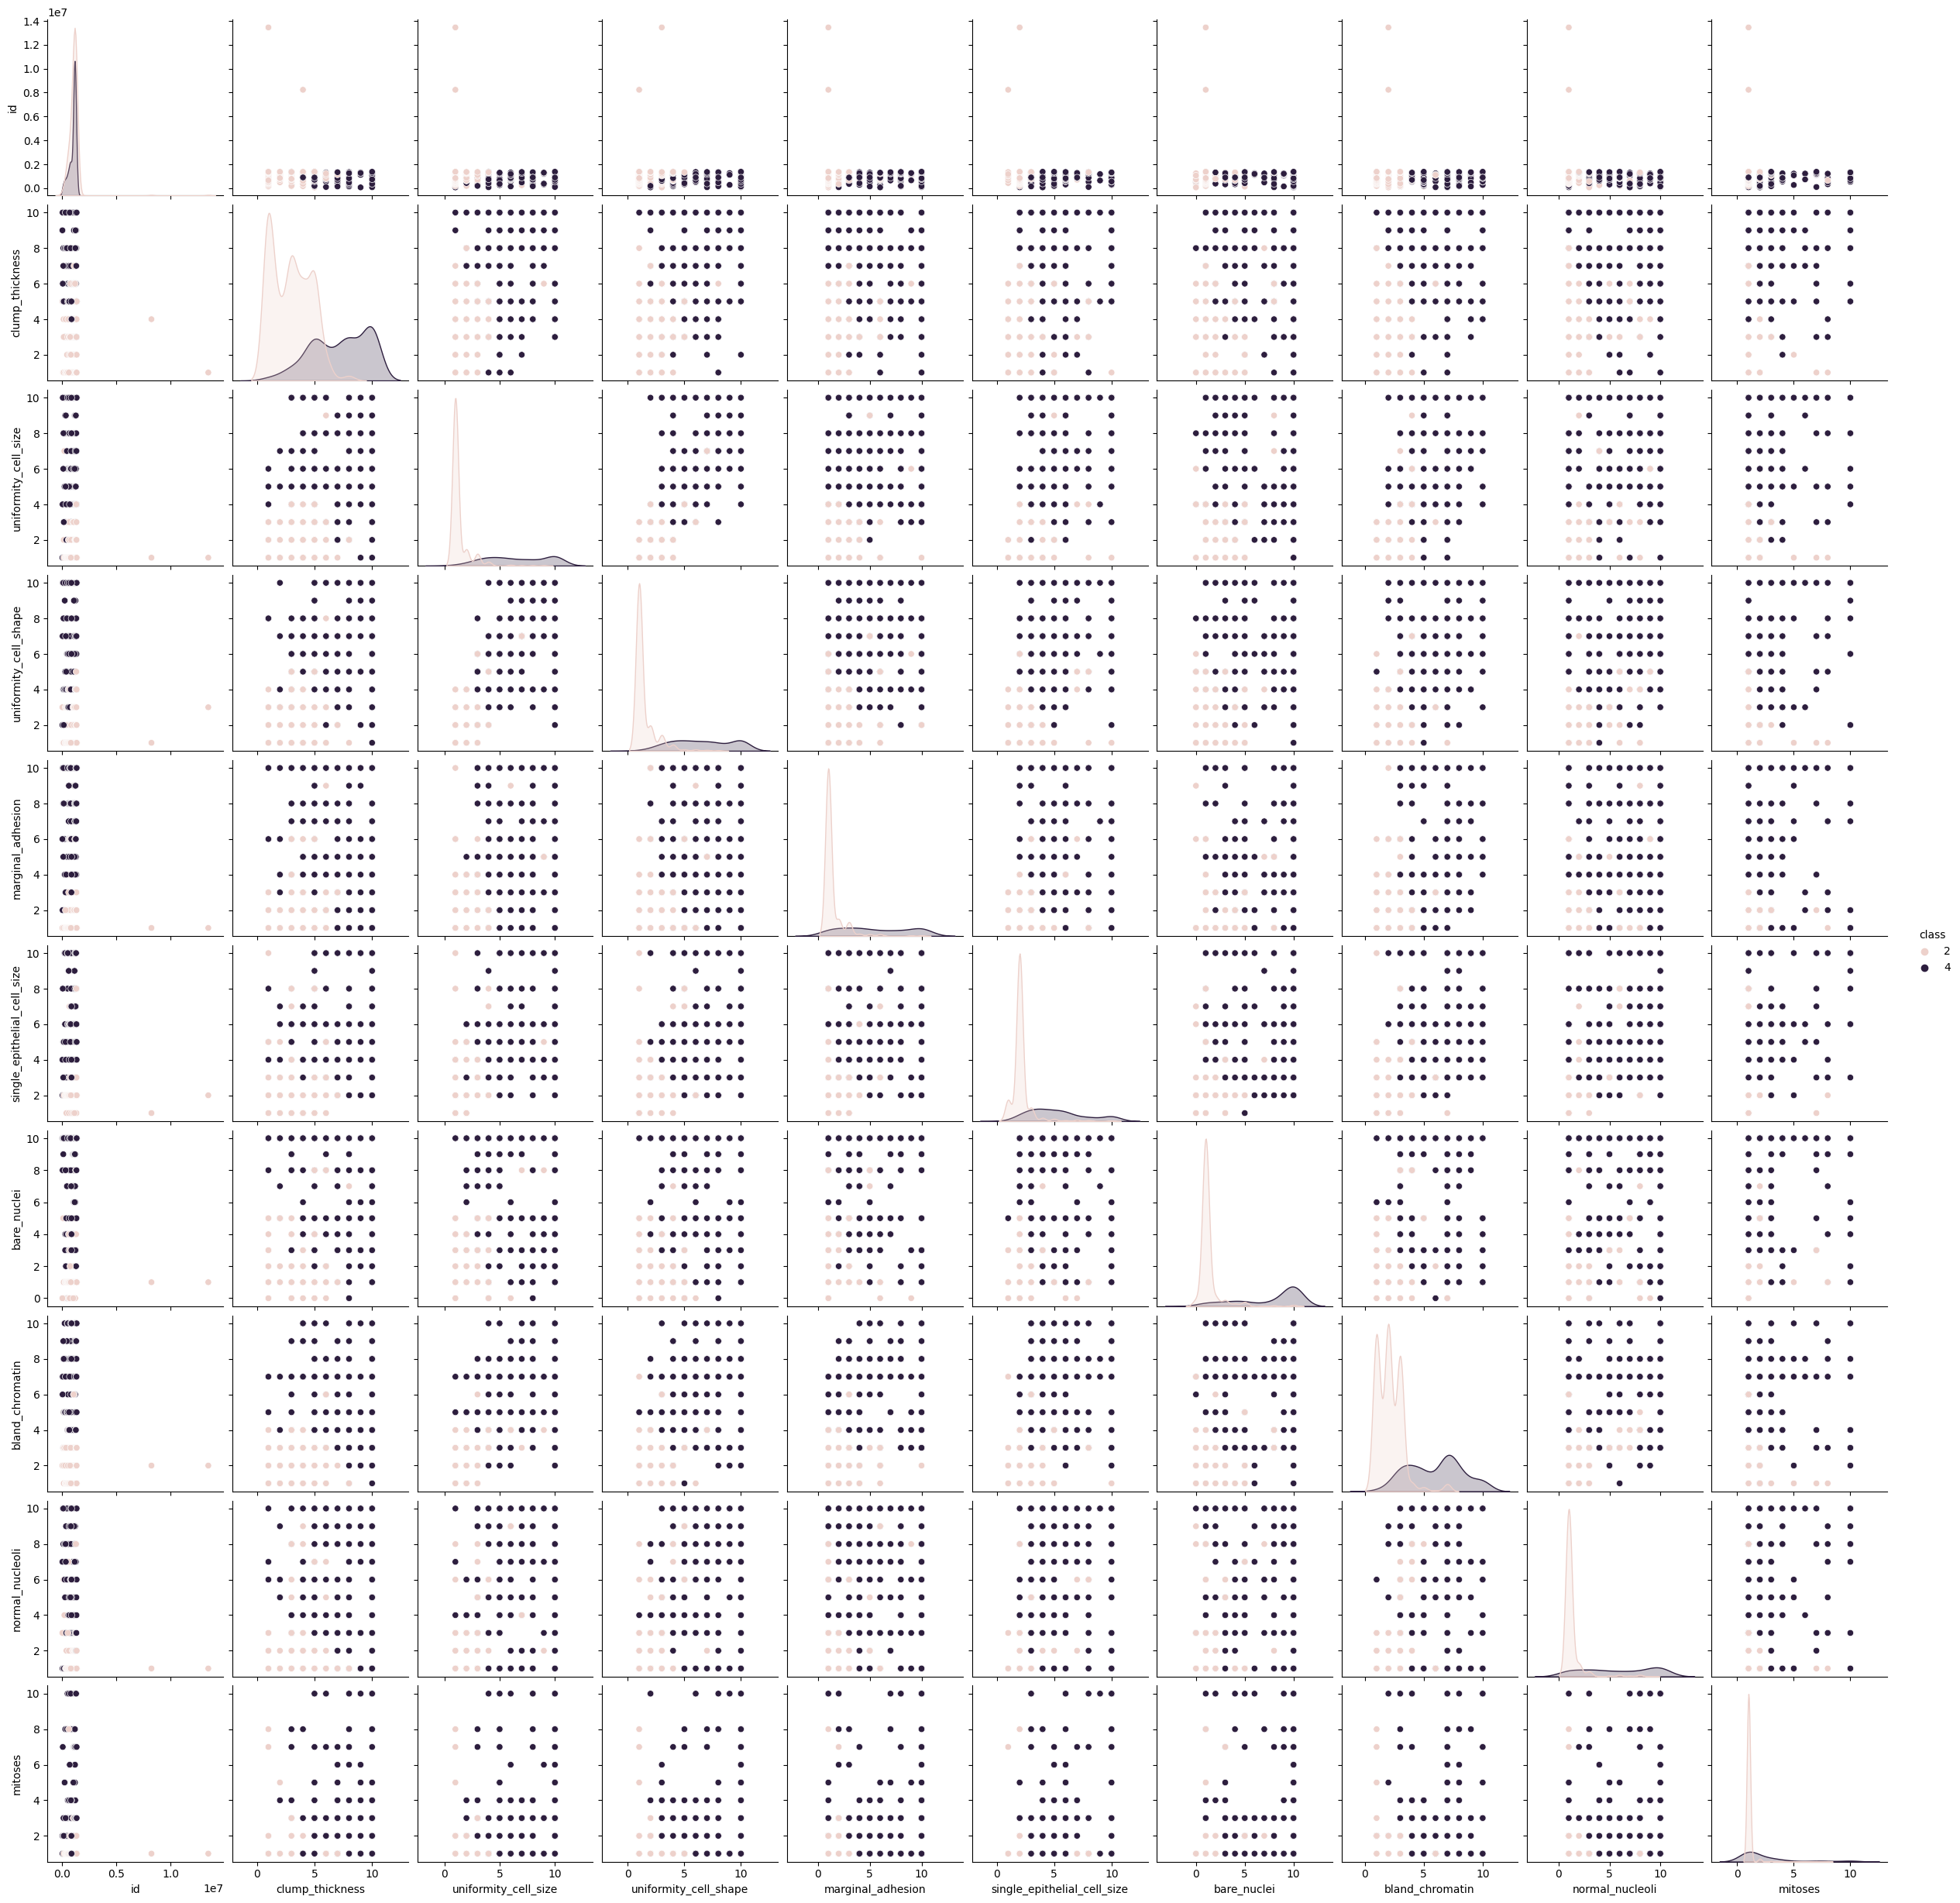

In [16]:
# Relación entre las diferentes variables del dataset.
sns.pairplot(data=data, hue="class")

#### **1.4)** Aísle las variables numéricas de las categóricas. Haga un análisis de correlación entre las mismas.

El dataset proporcionado no posee variables categóricas. Para hacer la correlación de variables necesitamos aplicar la función corr.

<AxesSubplot:>

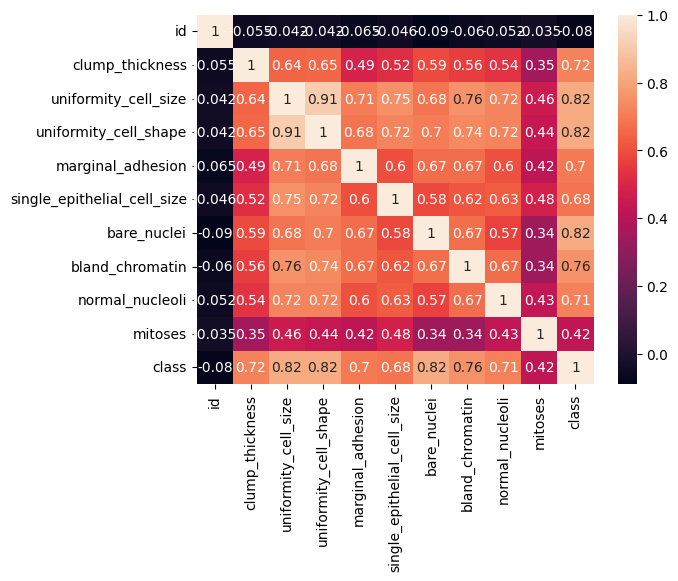

In [17]:
# Matriz de correlación de las variables numéricas.
correlation = data.corr()
sns.heatmap(correlation, annot=True)

#### **1.5)** Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.

Al elaborar tablas de frecuencia y gráficas de barras de las variables podemos obtener los siguientes resultados.

In [18]:
# Tabla de frercuencia de los valores de la columna "clump_thickness".
data["clump_thickness"].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: clump_thickness, dtype: int64

<AxesSubplot:xlabel='clump_thickness', ylabel='count'>

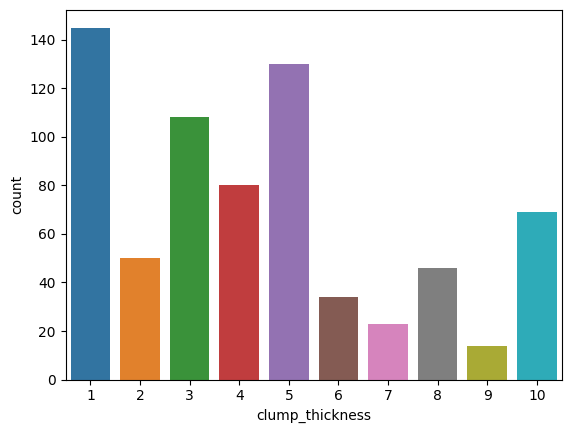

In [19]:
# Gráfico de barras de la columna "clump_thickness".
sns.countplot(x="clump_thickness", data=data)

In [20]:
# Tabla de frercuencia de los valores de la columna "uniformity_cell_size".
data["uniformity_cell_size"].value_counts()

1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: uniformity_cell_size, dtype: int64

<AxesSubplot:xlabel='uniformity_cell_size', ylabel='count'>

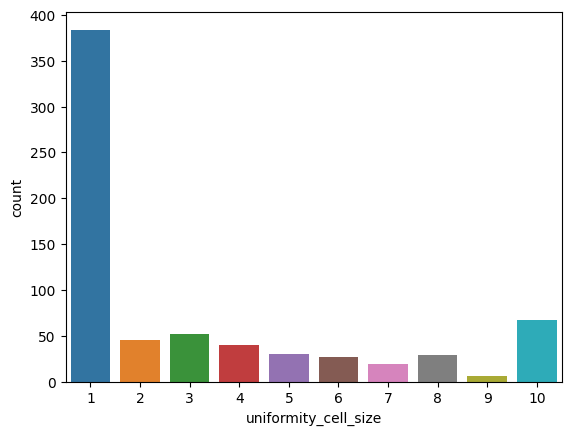

In [21]:
# Gráfico de barras de la columna "uniformity_cell_size".
sns.countplot(x="uniformity_cell_size", data=data)

In [22]:
# Tabla de frercuencia de los valores de la columna "uniformity_cell_shape".
data["uniformity_cell_shape"].value_counts()

1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: uniformity_cell_shape, dtype: int64

<AxesSubplot:xlabel='uniformity_cell_shape', ylabel='count'>

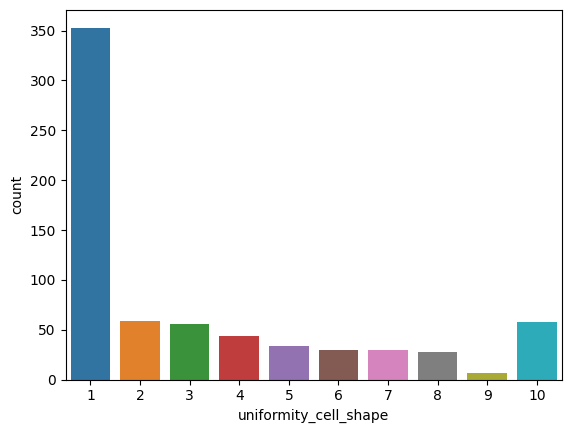

In [23]:
# Gráfico de barras de la columna "uniformity_cell_shape".
sns.countplot(x="uniformity_cell_shape", data=data)

In [24]:
# Tabla de frercuencia de los valores de la columna "marginal_adhesion".
data["marginal_adhesion"].value_counts()

1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: marginal_adhesion, dtype: int64

<AxesSubplot:xlabel='marginal_adhesion', ylabel='count'>

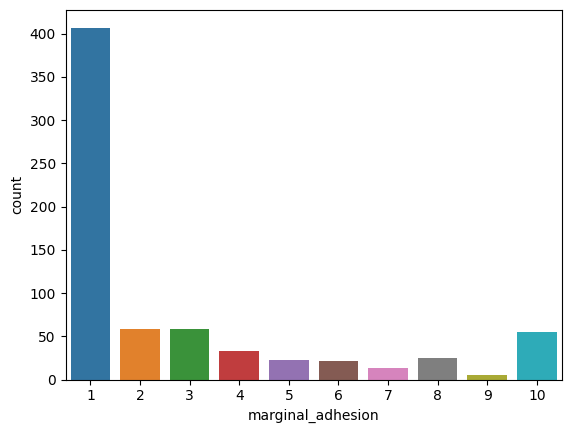

In [25]:
# Gráfico de barras de la columna "marginal_adhesion".
sns.countplot(x="marginal_adhesion", data=data)

In [26]:
# Tabla de frercuencia de los valores de la columna "single_epithelial_cell_size".
data["single_epithelial_cell_size"].value_counts()

2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: single_epithelial_cell_size, dtype: int64

<AxesSubplot:xlabel='single_epithelial_cell_size', ylabel='count'>

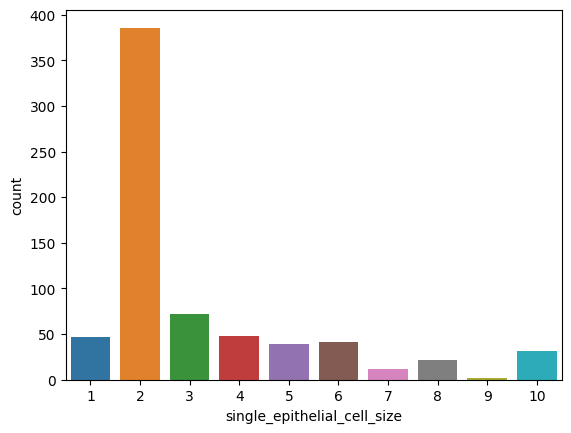

In [27]:
# Gráfico de barras de la columna "single_epithelial_cell_size".
sns.countplot(x="single_epithelial_cell_size", data=data)

In [28]:
# Tabla de frercuencia de los valores de la columna "bare_nuclei".
data["bare_nuclei"].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

<AxesSubplot:xlabel='bare_nuclei', ylabel='count'>

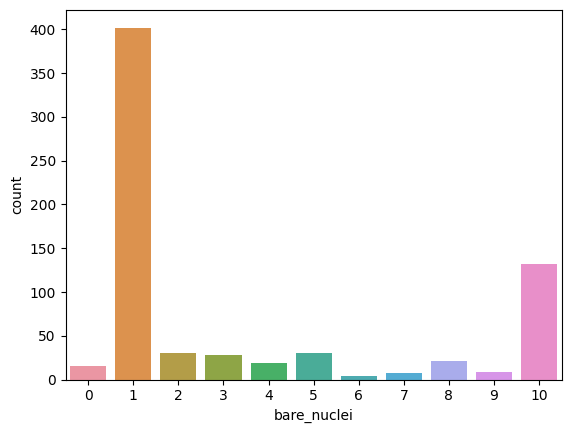

In [29]:
# Gráfico de barras de la columna "bare_nuclei".
sns.countplot(x="bare_nuclei", data=data)

In [30]:
# Tabla de frercuencia de los valores de la columna "bland_chromatin".
data["bland_chromatin"].value_counts()

2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: bland_chromatin, dtype: int64

<AxesSubplot:xlabel='bland_chromatin', ylabel='count'>

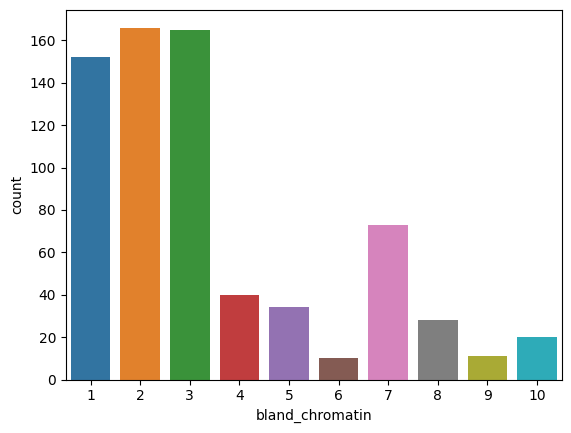

In [31]:
# Gráfico de barras de la columna "bland_chromatin".
sns.countplot(x="bland_chromatin", data=data)

In [32]:
# Tabla de frercuencia de los valores de la columna "normal_nucleoli".
data["normal_nucleoli"].value_counts()

1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name: normal_nucleoli, dtype: int64

<AxesSubplot:xlabel='normal_nucleoli', ylabel='count'>

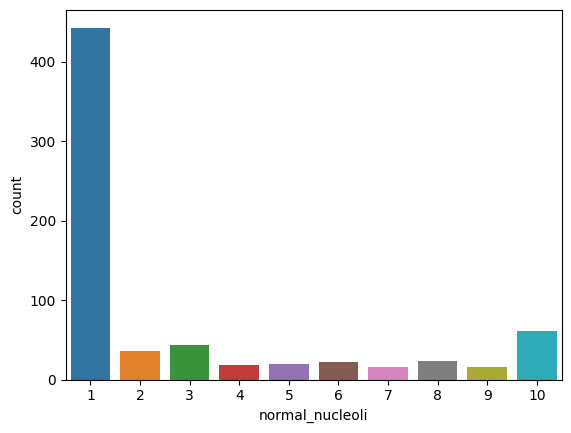

In [33]:
# Gráfico de barras de la columna "normal_nucleoli".
sns.countplot(x="normal_nucleoli", data=data)

In [34]:
# Tabla de frercuencia de los valores de la columna "mitoses".
data["mitoses"].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

<AxesSubplot:xlabel='mitoses', ylabel='count'>

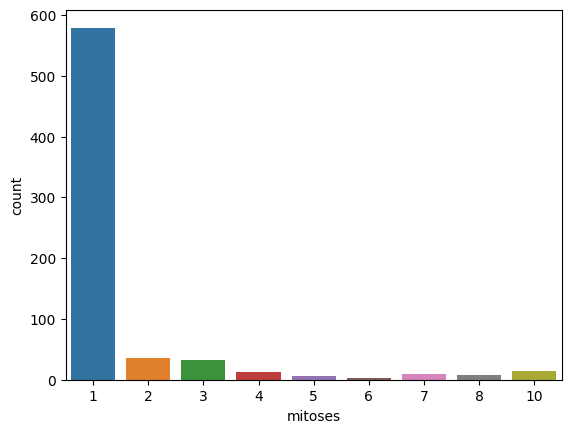

In [35]:
# Gráfico de barras de la columna "mitoses".
sns.countplot(x="mitoses", data=data)

In [36]:
# Tabla de frercuencia de los valores de la columna "class".
data["class"].value_counts()

2    458
4    241
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

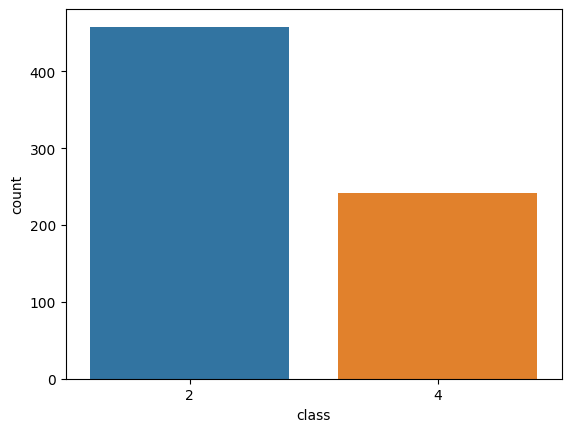

In [37]:
# Gráfico de barras de la columna "class".
sns.countplot(x="class", data=data)

#### **1.6)** Realice la limpieza de variables utilizando las técnicas vistas en clase, u otras que piense pueden ser de utilidad.

La única columna que necesitaba limpieza era la columna "bare_nuclei", que tenía datos de tipo string en lugar de números enteros. Esta columna fue limpiada anteriormente con el objetivo de realizar un análisis cuantitativo más fiel y sin dificultades. Podemos observar cómo la columna ahora está limpia viendo el tipo de dato de la misma y algunas estadísticas cuantitativas.

In [38]:
# Tipo de dato de la columna "bare_nuclei".
data.dtypes["bare_nuclei"]

dtype('int64')

In [39]:
# Estadísticas cualitativas de la columna "bare_nuclei".
data["bare_nuclei"].describe()

count    699.000000
mean       3.463519
std        3.640708
min        0.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: bare_nuclei, dtype: float64

#### **2.1)** Pruebe los modelos de regresión logística y el K-NN.

In [40]:
# Declarar X y Y
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Dividir en datos de entreno y prueba

In [56]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(data.drop('class' , axis = 1), 
                                                    data['class'], test_size = 0.30, 
                                                    random_state = 101)
print(X_entreno)

          id  clump_thickness  uniformity_cell_size  uniformity_cell_shape  \
435  1294562               10                     8                     10   
541  1171578                3                     1                      1   
381   846423               10                     6                      3   
611   803531                5                    10                     10   
647  1311108                1                     1                      1   
..       ...              ...                   ...                    ...   
75   1131294                1                     1                      2   
599  1334659                5                     2                      4   
575   385103                5                     1                      2   
337   798429                1                     1                      1   
523   672113                7                     5                      6   

     marginal_adhesion  single_epithelial_cell_size  bare_nucle

Normalizar datos

In [58]:
from sklearn.linear_model import LogisticRegression
modeloLog = LogisticRegression(max_iter = 500)
modeloLog.fit(X_entreno,y_entreno)
predicciones = modeloLog.predict(X_prueba)

Evaluación

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_prueba, predicciones))

              precision    recall  f1-score   support

           2       0.95      0.97      0.96       129
           4       0.95      0.91      0.93        81

    accuracy                           0.95       210
   macro avg       0.95      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



Gráfico de confusión

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Matriz de confusion")
print(confusion_matrix(y_prueba,predicciones))
print("accuracy_score")
print(accuracy_score(y_prueba, predicciones))

Matriz de confusion
[[125   4]
 [  7  74]]
accuracy_score
0.9476190476190476


En conclusión, hemos desarrollado un buen modelo en base a la regresión logística para clasificar los casos de madres

### Modelo KNN

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Normalizar variables

In [66]:
from sklearn.preprocessing import StandardScaler
escalador = StandardScaler()
escalador.fit(data.drop('class', axis = 1))
cols_std = escalador.transform(data.drop('class', axis = 1))
datos_std = pd.DataFrame(cols_std, columns = data.columns[:-1])
datos_std.head()

,id,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.796673,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.402275,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.147462,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912


Dividir en entreno y prueba

In [68]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(cols_std, data['class'],
                                                    test_size = 0.30, random_state = 0)

# Utilización de KNN
utilizaremos un k = 1

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)

Evaluando el modelo

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print("matriz de confusion")
print(confusion_matrix(y_prueba, pred))
print("reporte de clasificacion")
print(classification_report(y_prueba, pred))

matriz de confusion
[[129   6]
 [  4  71]]
reporte de clasificacion
              precision    recall  f1-score   support

           2       0.97      0.96      0.96       135
           4       0.92      0.95      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



Seleccionaremos un neuvo valor para K

In [71]:
tasa_error = []


for i in range(1, 40):    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_entreno, y_entreno)
    pred_i = knn.predict(X_prueba)
    tasa_error.append(np.mean(pred_i != y_prueba))

Text(0, 0.5, 'Tasa de Error')

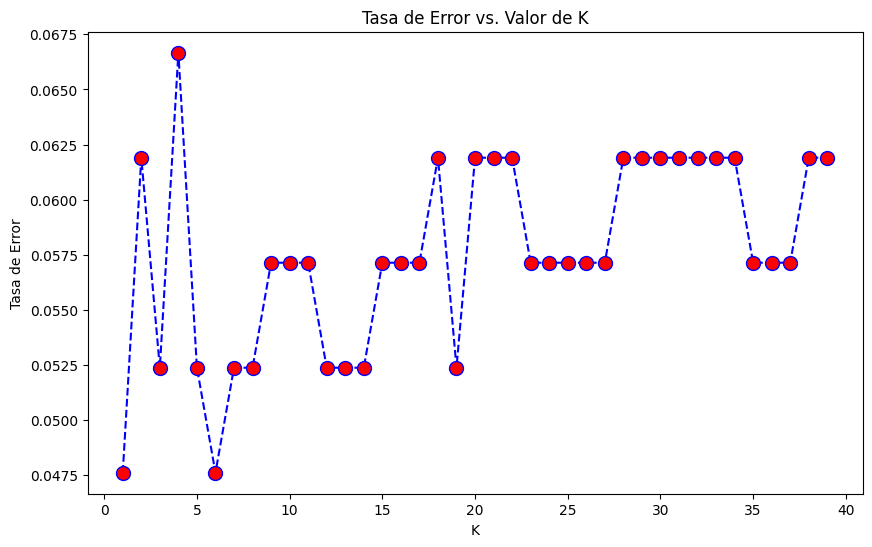

In [72]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40), tasa_error, color = 'blue', linestyle = 'dashed', marker = 'o',
         markerfacecolor = 'red', markersize = 10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

Podemos ver que a partir de K >= 6 la taza de error se mantiene dentro de 0.0525 y 0.0625
Lo pondremos a prueba

In [73]:
# AHORA CON K = 6
knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 6')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 6

Matriz de Confusión

[[130   5]
 [  5  70]]


              precision    recall  f1-score   support

           2       0.96      0.96      0.96       135
           4       0.93      0.93      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210



Se mantuvo prácticamente igual, probaremos con un K más elevado

In [74]:
# AHORA CON K = 6
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_entreno, y_entreno)
pred = knn.predict(X_prueba)

print('CON K = 15')
print()
print('Matriz de Confusión\n')
print(confusion_matrix(y_prueba,pred))
print('\n')
print(classification_report(y_prueba,pred))

CON K = 15

Matriz de Confusión

[[129   6]
 [  6  69]]


              precision    recall  f1-score   support

           2       0.96      0.96      0.96       135
           4       0.92      0.92      0.92        75

    accuracy                           0.94       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210



Obtuvimos resultados similares, pero consideramos que k = 6 es el valor indicado